Step 1: library imports and data import

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio


In [37]:
data = pd.read_csv('data/coupons.csv')
print(data.index)
print(data.columns)
data.head()

RangeIndex(start=0, stop=12684, step=1)
Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


Step 2: Investigate missing Data

In [38]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Remove Car from the data set since it has too few entries to be useful
Fix the age column to be more consistent as it is likely age groups

In [39]:
print(data["car"].value_counts())  ## too few data points to really be of use on a data set of this size
data.drop("car", axis=1)



car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [40]:
print(data["age"].value_counts())


age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64


In [41]:
data["age"] = data["age"].str.replace("below21", "0-20")
data["age"] = data["age"].str.replace("21", "21-25")
data["age"] = data["age"].str.replace("26", "26-30")
data["age"] = data["age"].str.replace("31", "31-35")
data["age"] = data["age"].str.replace("36", "36-40")
data["age"] = data["age"].str.replace("41", "41-45")
data["age"] = data["age"].str.replace("46", "46-50")
data["age"] = data["age"].str.replace("50plus", "51-99")

print(data["age"].value_counts())




age
21-25    2653
26-30    2559
31-35    2039
51-99    1788
36-40    1319
41-45    1093
46-50     686
0-20      547
Name: count, dtype: int64


In [42]:
data["coupon"] = data["coupon"].str.replace("Restaurant(<20)", "Restaurant < $20")
data["coupon"] = data["coupon"].str.replace("Restaurant(20-50)", "Restaurant $20 - $50")

print(data["coupon"].value_counts())


coupon
Coffee House             3996
Restaurant < $20         2786
Carry out & Take away    2393
Bar                      2017
Restaurant $20 - $50     1492
Name: count, dtype: int64


In [43]:
#Fix the time to Coupon Expiration to be a easier to plot



sum_exp_time_bool = data["toCoupon_GEQ5min"] + data["toCoupon_GEQ15min"] + data["toCoupon_GEQ25min"]
print(sum_exp_time_bool.value_counts())

data["Time to Coupon Expiration"] = data["toCoupon_GEQ5min"]

data.loc[sum_exp_time_bool == 1, "Time to Coupon Expiration"] = "5-15"
data.loc[sum_exp_time_bool == 2, "Time to Coupon Expiration"] = "15-25"
data.loc[sum_exp_time_bool == 3, "Time to Coupon Expiration"] = "25 Plus"

data["Time to Coupon Expiration"].value_counts()


2    5611
1    5562
3    1511
Name: count, dtype: int64


C:\Users\stepa\AppData\Local\Temp\ipykernel_82060\3581273994.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5-15' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[sum_exp_time_bool == 1, "Time to Coupon Expiration"] = "5-15"


Time to Coupon Expiration
15-25      5611
5-15       5562
25 Plus    1511
Name: count, dtype: int64

Reformat the Column names for easier plotting

In [44]:
#Clean the names of the Columns
data.rename(columns={'coupon': 'Coupon Type',
    'age': "Age Group",
    'weather': 'Weather Conditions',
    'destination' : 'Destination',
    'time':'Time',
    'expiration': 'Expiration', 
    'maritalStatus': 'Marital Status',
    'CoffeeHouse': 'Coffee House',
    'CarryAway': 'Carry out & Take away',
    'RestaurantLessThan20': 'Restaurant < $20',
    'Restaurant20To50': 'Restaurant $20 - $50',
    'gender': 'Gender'}, inplace=True)
data.head(0)

,Destination,passanger,Weather Conditions,temperature,Time,Coupon Type,Expiration,Gender,Age Group,Marital Status,...,Carry out & Take away,Restaurant < $20,Restaurant $20 - $50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Time to Coupon Expiration


# Plot Generation
Now generate a series of plots based on a list of the categories to see if we can determine which items are impacting coupon acceptance 

C:\Users\stepa\AppData\Local\Temp\ipykernel_82060\3284066881.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-45)
C:\Users\stepa\AppData\Local\Temp\ipykernel_82060\3284066881.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-45)


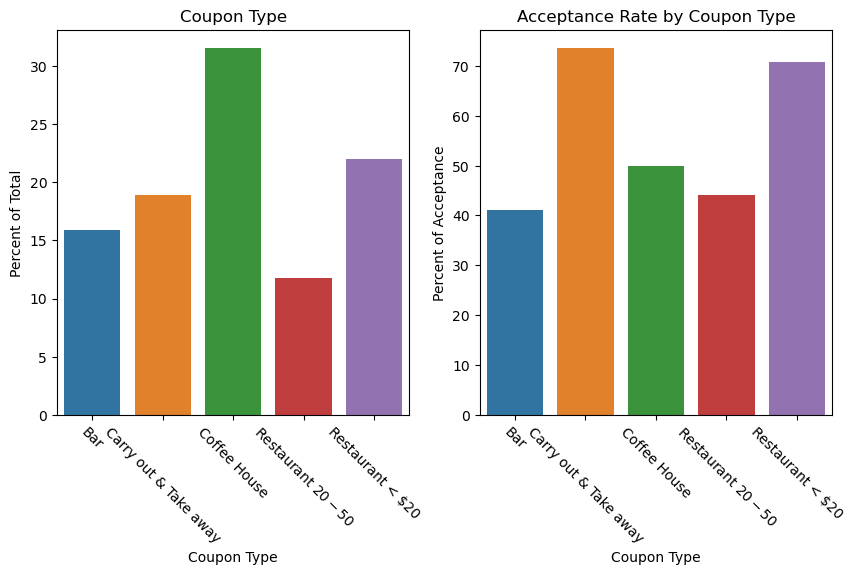

C:\Users\stepa\AppData\Local\Temp\ipykernel_82060\3284066881.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-45)
C:\Users\stepa\AppData\Local\Temp\ipykernel_82060\3284066881.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-45)


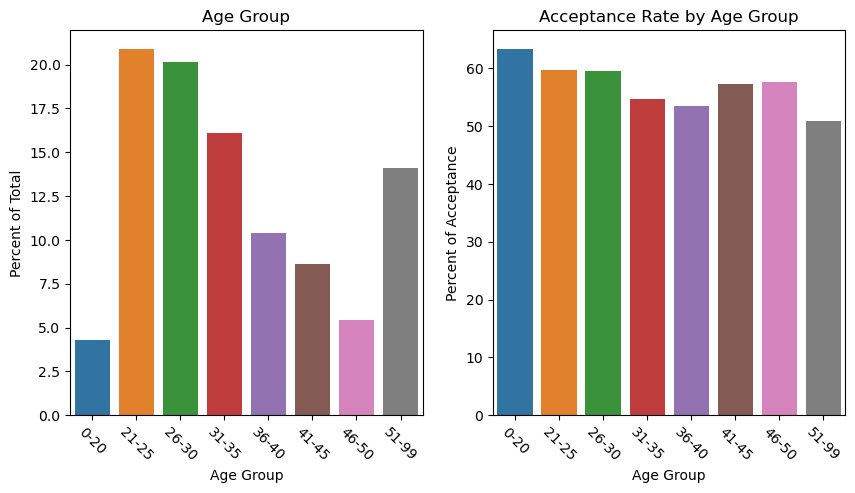

C:\Users\stepa\AppData\Local\Temp\ipykernel_82060\3284066881.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-45)
C:\Users\stepa\AppData\Local\Temp\ipykernel_82060\3284066881.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-45)


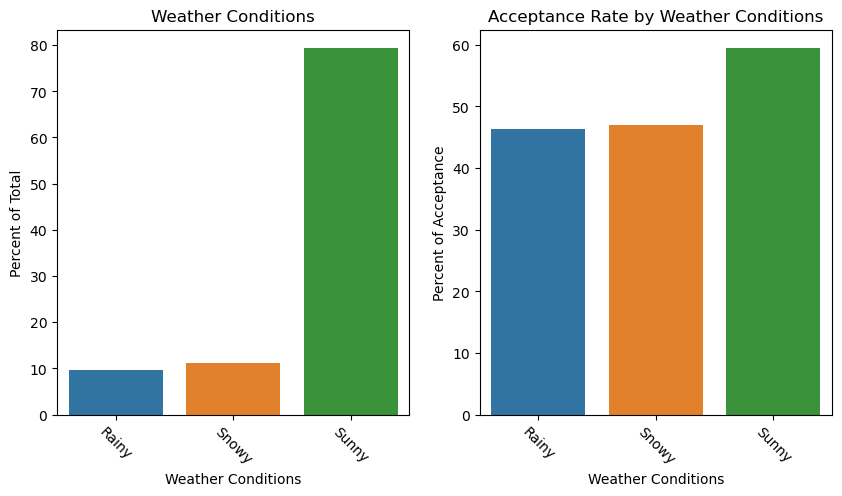

C:\Users\stepa\AppData\Local\Temp\ipykernel_82060\3284066881.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-45)
C:\Users\stepa\AppData\Local\Temp\ipykernel_82060\3284066881.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-45)


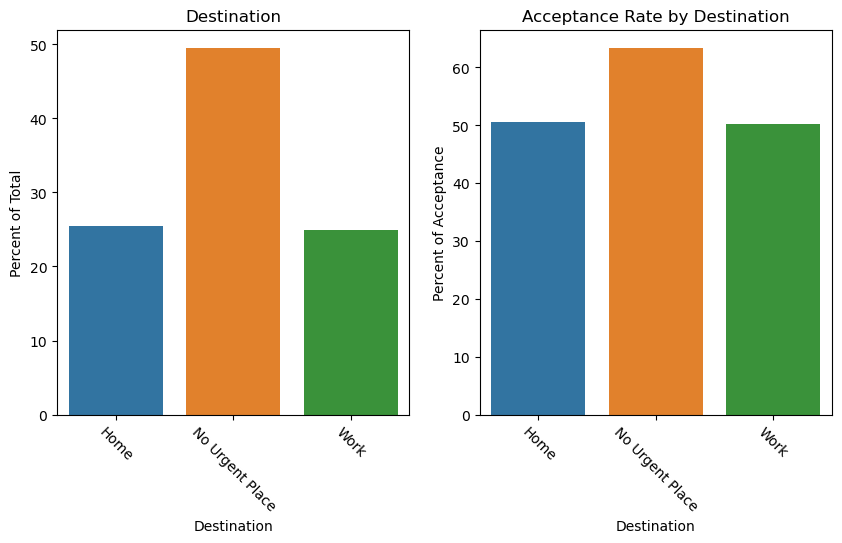

C:\Users\stepa\AppData\Local\Temp\ipykernel_82060\3284066881.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-45)
C:\Users\stepa\AppData\Local\Temp\ipykernel_82060\3284066881.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-45)


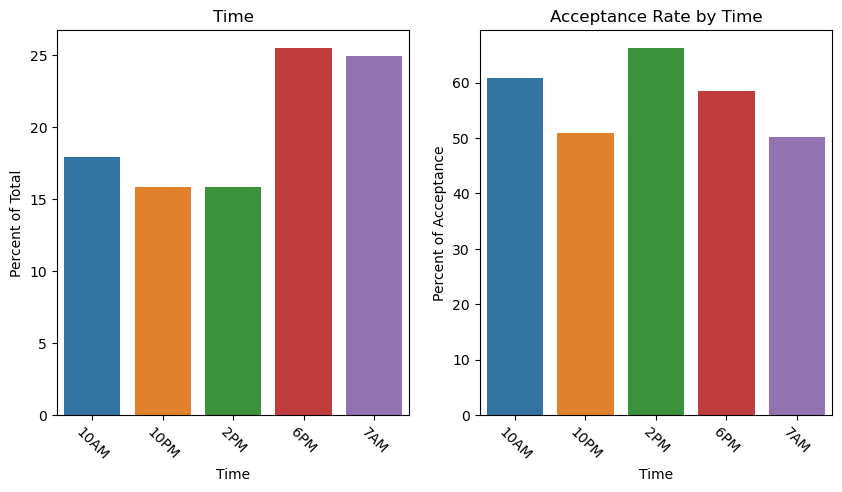

C:\Users\stepa\AppData\Local\Temp\ipykernel_82060\3284066881.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-45)
C:\Users\stepa\AppData\Local\Temp\ipykernel_82060\3284066881.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-45)


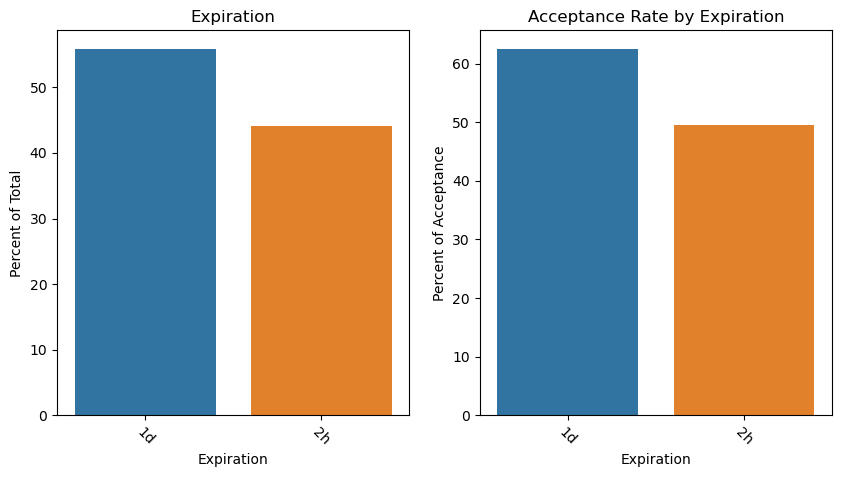

C:\Users\stepa\AppData\Local\Temp\ipykernel_82060\3284066881.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-45)
C:\Users\stepa\AppData\Local\Temp\ipykernel_82060\3284066881.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-45)


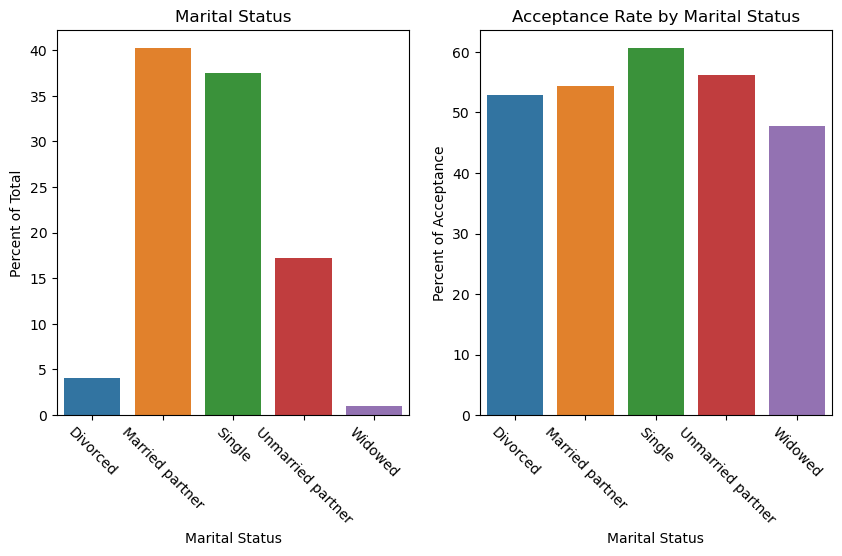

C:\Users\stepa\AppData\Local\Temp\ipykernel_82060\3284066881.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-45)
C:\Users\stepa\AppData\Local\Temp\ipykernel_82060\3284066881.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-45)


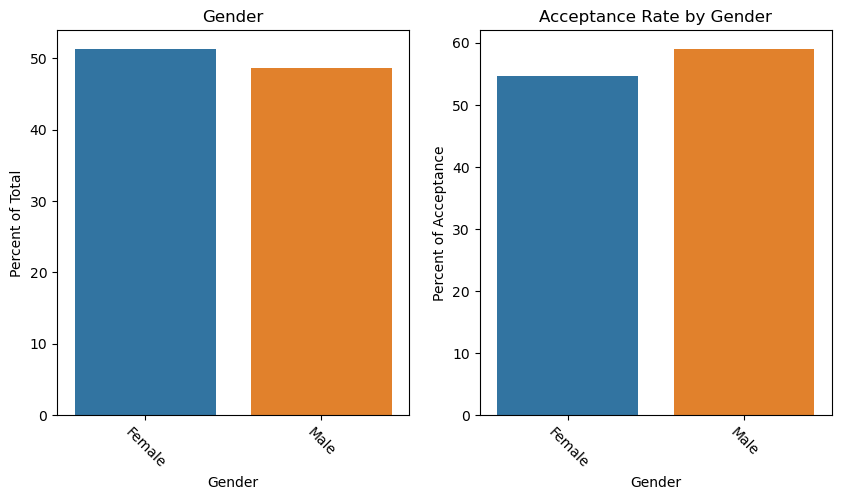

C:\Users\stepa\AppData\Local\Temp\ipykernel_82060\3284066881.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-45)
C:\Users\stepa\AppData\Local\Temp\ipykernel_82060\3284066881.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-45)


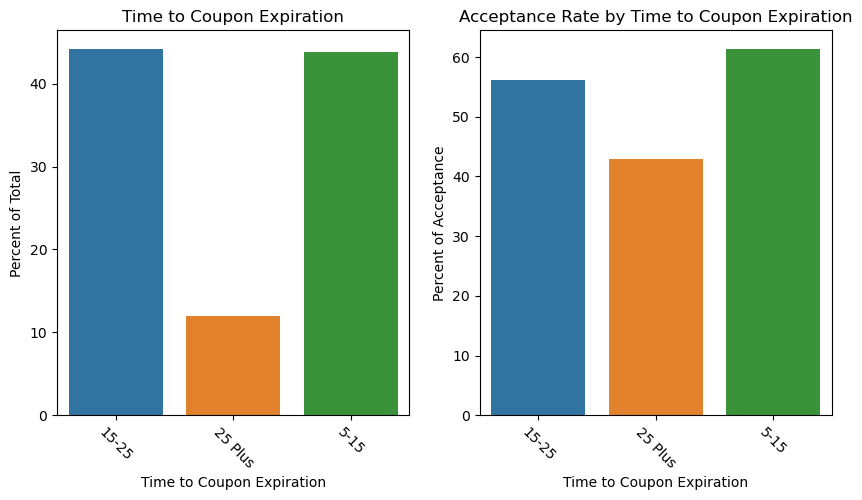

In [45]:
#divide by the amound of coupons for each category

list_of_categories_to_examine = ['Coupon Type', 'Age Group', 'Weather Conditions', 'Destination', 'Time', 'Expiration', 'Marital Status', 'Gender', 'Time to Coupon Expiration']

for col in list_of_categories_to_examine:
    #print(data[col].value_counts( normalize = True))
    fig, axes = plt.subplots(1,2, figsize=(10,5))
    val_count_series = data[col].value_counts(normalize=True)
    val_count_series.sort_index(inplace=True)
    sns.barplot(ax=axes[0], x = val_count_series.index, y = val_count_series*100, hue=val_count_series.index)
    axes[0].set_title(col)
    axes[0].set_ylabel("Percent of Total")
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-45)
    
    
    acceptance_percent =100* (data.groupby(col)['Y'].sum() / data.groupby(col)['Y'].count())
    acceptance_percent = acceptance_percent.sort_values(ascending=False)
    acceptance_percent.sort_index(inplace=True)

    sns.barplot(ax=axes[1], x = acceptance_percent.index, y = acceptance_percent, hue=acceptance_percent.index)
    axes[1].set_title("Acceptance Rate by " + col)
    axes[1].set_ylabel("Percent of Acceptance")
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-45)

    plt.savefig("Images/" + col + "_rates.png")
    
    plt.show()
    





# Conclusions
This makes sense as these offers when people are driving, therefore one would expect quicker food to have a higher take rate. The destination of no place urgent has a 10% impact on acceptance rate.  The expiration time does inhibit the accptance rate by 10%.  People are more likely to accept coupons late in the morning or early in the afternoon.  Finally, we should look at coupon acceptance for a given type of restaraunt based on the frequency for which that person visits a restraunt

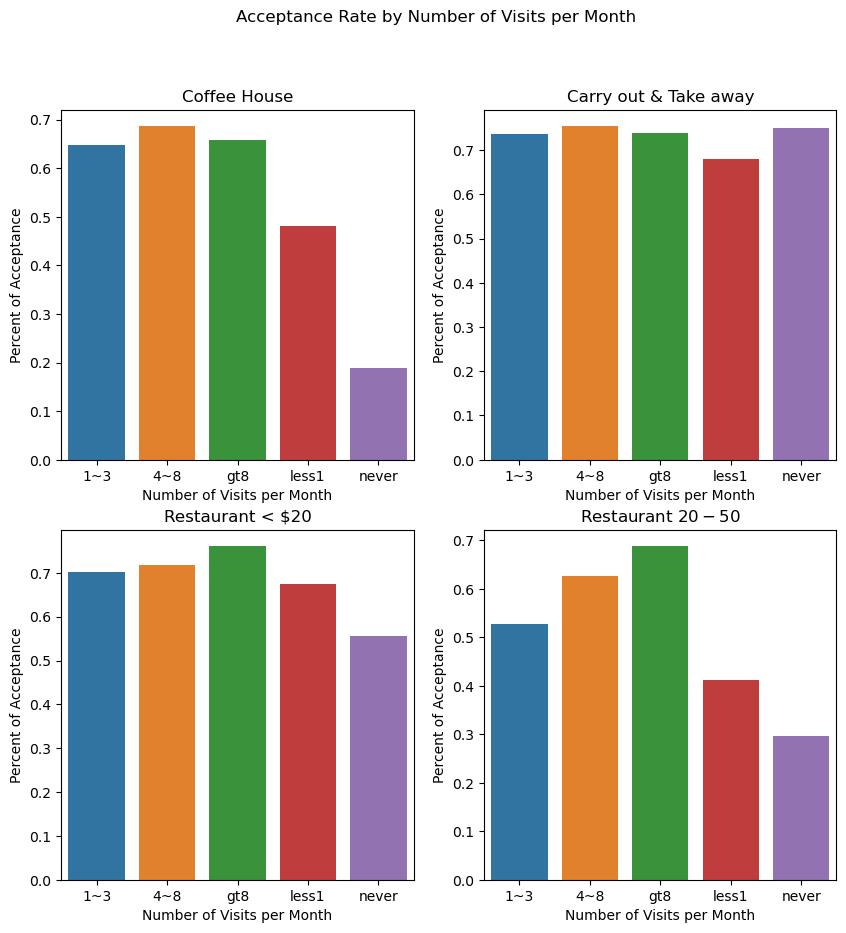

In [49]:
#Next look at the acceptance by frequency of visits for the different coupon types

restaurants = ['Coffee House', 'Carry out & Take away', 'Restaurant < $20', 'Restaurant $20 - $50']

fig, axes = plt.subplots(2,2, figsize=(10,10))


for idx, col in enumerate(restaurants):
    accepted_data = data.loc[(data['Y'] == 1) & (data['Coupon Type'] == col), col]
    data_total = data.loc[(data['Coupon Type'] == col), col]
    data_averages = accepted_data.value_counts()/data_total.value_counts()
    data_averages = data_averages.sort_index()
    sns.barplot(ax=axes[int(idx/2), idx % 2], x = data_averages.index, y = data_averages, hue=data_averages.index)

    axes[int(idx/2), idx % 2].set_title(col)
    axes[int(idx/2), idx % 2].set_ylabel("Percent of Acceptance")
    #axes[int(idx/2), idx % 2].set_xticklabels(axes[0].get_xticklabels(), rotation=-45)
    axes[int(idx/2), idx % 2].set_xlabel("Number of Visits per Month")

fig.suptitle("Acceptance Rate by Number of Visits per Month")
plt.savefig("Images/visits_by_type_of_restraunt.png")




# Conclusions 2

This series of plot is also consistent with people's behavior as one would expect a larger group of people 